### ÌäπÏ†ïÎã®Ïñ¥ Í≤åÏãúÍ∏Ä Ï∞æÍ∏∞

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import time
import pandas as pd
import numpy as np

In [2]:
raw_total = pd.read_excel('C:/Users/jhjh3/class/datasalon-master/02_data_class/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.head()

content        date   like  \
0  Îçî Îä¶Í∏∞Ï†ÑÏóê Ï†úÏ£ºÎèÑÎ°ú Îñ†ÎÇòÏüàüòç.#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§ Í∞ÑÎã®Ìûà 1ÌÉÑ Î™®ÏïÑÎ¥Ñ!#Ï†úÏ£ºÏó¨Ìñâ Ïöî ÌïÑ...  2018-12-07  1,402   
1  12ÏõîÏóê Ï†úÏ£ºÎèÑÎ•º Í∞ÄÏïºÌïòÎäîÏù¥Ïú†üçä.#Ï†úÏ£ºÌï´Ìîå Î™®Ïùå ÎÅùÌåêÏôïüòçÏù¥Í±∞ ÌïòÎÇòÎ©¥ Í≤®Ïö∏ #Ï†úÏ£ºÏó¨Ìñâ...  2018-12-03    368   
2  11Ïõî ÎÜìÏπòÏßÄ ÎßêÏïÑÏïº Ìï† Ï†úÏ£º Í¥ÄÍ¥ë.Í∞ÄÏùÑÎ∞îÎûåÏù¥ ÏµúÍ≥†Ï°∞Ïóê Ïù¥Î•¥Îäî 11ÏõîÏ∂îÏö¥ Í≤®Ïö∏ÏùÑ Ïïû...  2018-11-02    166   
3  Íµ≠ÎØºÌïôÍµêÏÑ∏ÎåÄ#Ï†úÏ£ºÍ¥ÄÍ¥ë#Ï†úÏ£ºÏÇ¥Ïù¥#Ï†úÏ£ºÏù¥Ï£ºÎØº#ÏïÑÎùºÎèôÏ£ºÎØº#ÏÇºÎÇ®Îß§Ïßë #ÏÉàÌï¥Ï≤´ÎÇ†#ÎìúÎùºÏù¥Î∏å#Î™Ö...  2019-01-01     28   
4  #Ï†úÏ£ºÍ¥ÄÍ¥ë #Ï†úÏ£º #ÎèîÎÇòÏù¥Ìä∏ #Ïä§Ìä∏Î†àÏä§ #ÌíÄÏûê #Ï∂§Ï∂îÎ©∞ #ÎïÄÎÇ†Î†§ #Í∞ÄÎÅîÏùÄÍ¥úÏ∞ÆÏïÑ #Ïù∏...  2019-01-01     12   

    place                                               tags  
0     NaN  ['#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÎèÑÏó¨Ìñâ', '#Ï†úÏ£ºÍ∞Ä...  
1     NaN  ['#Ï†úÏ£ºÌï´Ìîå', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£º', '#Ï†úÏ£ºÎèÑ', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#...  
2     NaN  ['#honestin', '#Ïñ¥ÎãàÏä§Ìã¥', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£º', '#Ï†úÏ£ºÎèÑ',...  
3  Î™ÖÏõîÍµ≠ÎØºÌïôÍµê  ['#Ï†úÏ£ºÍ¥ÄÍ¥ë', '#Ï†úÏ£ºÏÇ¥Ïù¥', '#Ï†úÏ£ºÏù¥Ï£ºÎØº', '#ÏïÑÎùºÎèôÏ£ºÎØº', '#ÏÇºÎÇ®Îß§Ïßë'...  
4     NaN  ['#Ï†úÏ£ºÍ¥ÄÍ¥ë', '#Ï†úÏ£º', '#ÎèîÎÇòÏù¥Ìä∏', '#Ïä§Ìä∏Î†àÏä§', '#ÌíÄÏûê', '#Ï∂§Ï∂î...

In [3]:
select_word = 'Ìï¥ÎèãÏù¥'

check_list = []

for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)
        
check_list
select_df = raw_total[check_list]        
# len(select_df['content'])

In [4]:
select_df.head()

content        date like  \
34    ..‚ÄúÏø†Î£ΩÏø†Î£Ω Ìï¥Ìä∏Îß® ÎßàÏî∏!‚Äù.Ï†úÏ£ºÎ∞©Ïñ∏ÏúºÎ°ú ‚ÄòÏø®Ïø® ÏûêÎçò Ìï¥Í∞Ä Îñ¥ÏäµÎãàÎã§‚Äô.Îã§ÏÇ¨Îã§ÎÇú Ìñà...  2019-01-01   89   
73    ÏïÑÎìÄ 2018!ü§ßüëãüèª2019üê∑Ìô©Í∏àÎèºÏßÄÌï¥Ïùò Ï≤´ ÏùºÏ∂úüåÖÏùÑ ÎßåÎÇòÎ≥º Ïàò ÏûàÎäî Ï†úÏ£º ÏùºÏ∂úÎ™ÖÏÜå...  2018-12-31   18   
142   4ÏùºÍ∞Ñ Ìú¥ ~ Î≠êÌïòÏßÄ? „Ö† Î≠êÌï†Íπå?. #Ìï¥ÎÑòÏù¥#Ìï¥ÎèãÏù¥ Ïñ¥ÎîîÎ°úÍ∞ÄÏßÄ? .ÎàÑÏõåÏÑúÎ≥¥ÎäîÍ∑πÏû•?...  2018-12-28   94   
441   ÏàúÍ∞ÑÌè¨Ï∞©ÏóÑÏ≤≠ ÎÜÄÎûêÎÑ§ÏöîÍ∞ëÏûêÍ∏∞ ÏÉàÎì§Ïù¥ Î¨¥ÎçîÍ∏∞Î°ú ÎÇòÌÉÄÎÇòÏÑúÎÇ†ÏïÑÏò§Î•¥Í∏∏Îûò „ÜçÍ∑∏Ï™ΩÏóê Î¨¥Ïä®Ïùº ÏûàÎäî...  2018-12-18   77   
2458  Ìï¥ÎèãÏù¥#Ï†úÏ£º #ÌòºÏ†ÄÏòµÏÑúÏòà #Ï†úÏ£ºÏä§ÌÉÄÍ∑∏Îû® #Ï†úÏ£ºÎèÑ #Ï†úÏ£ºÏó¨Ìñâ #Ï†úÏ£ºÍ¥ÄÍ¥ë #Ï†úÏ£ºÎèÑÏó¨Ìñâ ...  2018-10-23   81   

         place                                               tags  
34    ÏÑúÍ∑ÄÌè¨ Î≤ïÌôòÌè¨Íµ¨                                                 []  
73     Jeju-do  ['#Ï†úÏ£º', '#Ï†úÏ£ºÎèÑ', '#ÏÑúÍ∑ÄÌè¨', '#Ï†úÏ£ºÎèÑÎØº', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£º...  
142        NaN  ['#Ìï¥ÎÑòÏù¥', '#Ìï¥ÎèãÏù¥', '#Ï†úÏ£º', '#jejudo', '#jeju', '#...  
441   Ï†úÏ£ºÌîÑÎ†àÏûÑÏä§ÌååÎπå  ['#Ï†úÏ£ºÎèÑÍ≥µÌï≠', '#ÌîÑÎ†àÏûÑÌéúÏÖò', '#ÌîÑÎ†àÏûÑÏä§ÌååÎπå', '#Ï†úÏ£º', '#Ï†úÏ£ºÌîÑÎ†àÏûÑ...  
2458       NaN  ['#Ï†úÏ£º', '#ÌòºÏ†ÄÏòµÏÑúÏòà', '#Ï†úÏ£ºÏä§ÌÉÄÍ∑∏Îû®', '#Ï†úÏ£ºÎèÑ', '#Ï†úÏ£ºÏó¨Ìñâ', ...

In [5]:
select_df.index
for i in select_df.index:
    print(select_df.loc[i, 'content'])
    print('-'*50)

..‚ÄúÏø†Î£ΩÏø†Î£Ω Ìï¥Ìä∏Îß® ÎßàÏî∏!‚Äù.Ï†úÏ£ºÎ∞©Ïñ∏ÏúºÎ°ú ‚ÄòÏø®Ïø® ÏûêÎçò Ìï¥Í∞Ä Îñ¥ÏäµÎãàÎã§‚Äô.Îã§ÏÇ¨Îã§ÎÇú ÌñàÎçò Î¨¥Ïà†ÎÖÑÏùÑ Î≥¥ÎÇ¥Í≥† Í∏∞Ìï¥ÎÖÑÏùò ÏÉàÎ°úÏö¥ Í∏∞Ïö¥ÏùÑ ÏñªÍ≥†ÏûêÎ∞ïÎ¨ºÍ¥ÄÏóêÏÑú 5Î∂ÑÍ±∞Î¶¨ Î≤ïÌôòÌè¨Íµ¨Î°ú Ìï¥ÎèãÏù¥Î•º Î≥¥Îü¨ ÎÇòÏôîÏñ¥Ïöî..ÏÉàÌï¥Ïùò Îñ†Ïò§Î•¥Îäî ÌÉúÏñëÏùò Í∏∞Ïö¥ Îì¨ÎøçÎ∞õÏúºÏãúÍ≥† Ïò¨ Ìï¥ Î™®Îì† Î∂ÑÎì§Ïùò Í∞ÄÏ†ïÏóêÌñâÎ≥µÍ≥º ÏõÉÏùåÏù¥ Í∞ÄÎìùÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§....üåøÏ†úÏ£ºÏùò ÏûêÏó∞ÏùÑ Í≥†Ïä§ÎûÄÌûà Îã¥ÏùÄÏ†úÏ£ºÌòï ÏÉùÌÉú ÏïºÏÉùÌôî Ï†ïÏõê [ÏÑùÎ∂ÄÏûë Î∞ïÎ¨ºÍ¥Ä].üåøÏπúÌôòÍ≤Ω Í∞êÏÑ± ÌûêÎßÅ Ïä§ÌÖåÏù¥[ÏÑúÍ∑ÄÌè¨ Í∑§Î¶ºÏÑ±]
--------------------------------------------------
ÏïÑÎìÄ 2018!ü§ßüëãüèª2019üê∑Ìô©Í∏àÎèºÏßÄÌï¥Ïùò Ï≤´ ÏùºÏ∂úüåÖÏùÑ ÎßåÎÇòÎ≥º Ïàò ÏûàÎäî Ï†úÏ£º ÏùºÏ∂úÎ™ÖÏÜå‚ù£Ô∏è. #Ï†úÏ£º #Ï†úÏ£ºÎèÑ #ÏÑúÍ∑ÄÌè¨ #Ï†úÏ£ºÎèÑÎØº #Ï†úÏ£ºÏó¨Ìñâ #Ï†úÏ£ºÎèÑÏó¨Ìñâ #Ï†úÏ£ºÍ¥ÄÍ¥ëÏßÄ #Ï†úÏ£ºÍ¥ÄÍ¥ë #Ï†úÏ£ºÌï´Ìîå #Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§ #ÏÑ†Ìåî #ÎßûÌåî #2019 #HAPPYNEWYEAR #ÏÉàÌï¥ #ÏÉàÌï¥ÏùºÏ∂ú #ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â #ÏÜ°ÏïÖÏÇ∞ #Í¥ëÏπòÍ∏∞Ìï¥Î≥Ä #ÌïúÎùºÏÇ∞ #Ïö©ÎààÏù¥Ïò

In [6]:
select_word_list = ['Ìï¥ÎèãÏù¥', 'Î∞ïÎ¨ºÍ¥Ä', 'ÌûêÎßÅ', 'Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§', 'ÏÑ≠ÏßÄÏΩîÏßÄ']

for select_word in select_word_list:
    check_list = []
    
    for content in raw_total['content']:
        if select_word in content:
            check_list.append(True)
        else:
            check_list.append(False)
        
    select_df = raw_total[check_list]        
    # len(select_df['content'])
    fpath = f'C:/Users/jhjh3/class/datasalon-master/02_data_class/5_Jeju_Hotplace/newfiles/select_data_{select_word}.xlsx'
    select_df.to_excel(fpath)


In [7]:
select_word_list = ['Ìï¥ÎèãÏù¥', 'Î∞ïÎ¨ºÍ¥Ä', 'ÌûêÎßÅ', 'Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§', 'ÏÑ≠ÏßÄÏΩîÏßÄ']

def select_word(select_word_list):
    for select_word in select_word_list:
        check_list = []
        for content in raw_total['content']:
            if select_word in content:
                check_list.append(True)
            else:
                check_list.append(False)
                
        select_df = raw_total[check_list]
        fpath = 'C:/Users/jhjh3/class/datasalon-master/02_data_class/5_Jeju_Hotplace/newfiles/select_data_{}_class.xlsx'.format(select_word)
        select_df.to_excel(fpath, index = False)

In [8]:
select_word_list = ['Ìï¥ÎèãÏù¥', 'Î∞ïÎ¨ºÍ¥Ä', 'ÌûêÎßÅ', 'Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§', 'ÏÑ≠ÏßÄÏΩîÏßÄ']
select_word(select_word_list)

In [9]:
import wordcloud

In [10]:
raw_total = pd.read_excel('C:/Users/jhjh3/class/datasalon-master/02_data_class/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.head()

content        date   like  \
0  Îçî Îä¶Í∏∞Ï†ÑÏóê Ï†úÏ£ºÎèÑÎ°ú Îñ†ÎÇòÏüàüòç.#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§ Í∞ÑÎã®Ìûà 1ÌÉÑ Î™®ÏïÑÎ¥Ñ!#Ï†úÏ£ºÏó¨Ìñâ Ïöî ÌïÑ...  2018-12-07  1,402   
1  12ÏõîÏóê Ï†úÏ£ºÎèÑÎ•º Í∞ÄÏïºÌïòÎäîÏù¥Ïú†üçä.#Ï†úÏ£ºÌï´Ìîå Î™®Ïùå ÎÅùÌåêÏôïüòçÏù¥Í±∞ ÌïòÎÇòÎ©¥ Í≤®Ïö∏ #Ï†úÏ£ºÏó¨Ìñâ...  2018-12-03    368   
2  11Ïõî ÎÜìÏπòÏßÄ ÎßêÏïÑÏïº Ìï† Ï†úÏ£º Í¥ÄÍ¥ë.Í∞ÄÏùÑÎ∞îÎûåÏù¥ ÏµúÍ≥†Ï°∞Ïóê Ïù¥Î•¥Îäî 11ÏõîÏ∂îÏö¥ Í≤®Ïö∏ÏùÑ Ïïû...  2018-11-02    166   
3  Íµ≠ÎØºÌïôÍµêÏÑ∏ÎåÄ#Ï†úÏ£ºÍ¥ÄÍ¥ë#Ï†úÏ£ºÏÇ¥Ïù¥#Ï†úÏ£ºÏù¥Ï£ºÎØº#ÏïÑÎùºÎèôÏ£ºÎØº#ÏÇºÎÇ®Îß§Ïßë #ÏÉàÌï¥Ï≤´ÎÇ†#ÎìúÎùºÏù¥Î∏å#Î™Ö...  2019-01-01     28   
4  #Ï†úÏ£ºÍ¥ÄÍ¥ë #Ï†úÏ£º #ÎèîÎÇòÏù¥Ìä∏ #Ïä§Ìä∏Î†àÏä§ #ÌíÄÏûê #Ï∂§Ï∂îÎ©∞ #ÎïÄÎÇ†Î†§ #Í∞ÄÎÅîÏùÄÍ¥úÏ∞ÆÏïÑ #Ïù∏...  2019-01-01     12   

    place                                               tags  
0     NaN  ['#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÎèÑÏó¨Ìñâ', '#Ï†úÏ£ºÍ∞Ä...  
1     NaN  ['#Ï†úÏ£ºÌï´Ìîå', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£º', '#Ï†úÏ£ºÎèÑ', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#...  
2     NaN  ['#honestin', '#Ïñ¥ÎãàÏä§Ìã¥', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£º', '#Ï†úÏ£ºÎèÑ',...  
3  Î™ÖÏõîÍµ≠ÎØºÌïôÍµê  ['#Ï†úÏ£ºÍ¥ÄÍ¥ë', '#Ï†úÏ£ºÏÇ¥Ïù¥', '#Ï†úÏ£ºÏù¥Ï£ºÎØº', '#ÏïÑÎùºÎèôÏ£ºÎØº', '#ÏÇºÎÇ®Îß§Ïßë'...  
4     NaN  ['#Ï†úÏ£ºÍ¥ÄÍ¥ë', '#Ï†úÏ£º', '#ÎèîÎÇòÏù¥Ìä∏', '#Ïä§Ìä∏Î†àÏä§', '#ÌíÄÏûê', '#Ï∂§Ï∂î...

In [11]:
raw_total['tags'][:10]

0    ['#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÎèÑÏó¨Ìñâ', '#Ï†úÏ£ºÍ∞Ä...
1    ['#Ï†úÏ£ºÌï´Ìîå', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£º', '#Ï†úÏ£ºÎèÑ', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#...
2    ['#honestin', '#Ïñ¥ÎãàÏä§Ìã¥', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£º', '#Ï†úÏ£ºÎèÑ',...
3    ['#Ï†úÏ£ºÍ¥ÄÍ¥ë', '#Ï†úÏ£ºÏÇ¥Ïù¥', '#Ï†úÏ£ºÏù¥Ï£ºÎØº', '#ÏïÑÎùºÎèôÏ£ºÎØº', '#ÏÇºÎÇ®Îß§Ïßë'...
4    ['#Ï†úÏ£ºÍ¥ÄÍ¥ë', '#Ï†úÏ£º', '#ÎèîÎÇòÏù¥Ìä∏', '#Ïä§Ìä∏Î†àÏä§', '#ÌíÄÏûê', '#Ï∂§Ï∂î...
5    ['#Ï†úÏ£ºÏóêÏù∏Í∞êÍ∑§Î∞≠', '#Í∞êÍ∑§Ï≤¥Ìóò', '#Í∑§Îî∞Í∏∞Ï≤¥Ìóò', '#Ï≤¥ÌóòÎÜçÏû•', '#Í∞êÍ∑§Îî∞...
6    ['#Ï†úÏ£ºÏóêÏù∏Í∞êÍ∑§Î∞≠', '#Í∞êÍ∑§Ï≤¥Ìóò', '#Í∑§Îî∞Í∏∞Ï≤¥Ìóò', '#Ï≤¥ÌóòÎÜçÏû•', '#Í∞êÍ∑§Îî∞...
7    ['#niceweather', '#winterswimming', '#Ï†úÏ£º', '#Î∞î...
8              ['#Ï†úÏ£ºÏóêÏÑúÌïúÎ≥µÏûÖÍ≥†Ïó¨ÌñâÌïòÍ∏∞', '#ÌïúÎ≥µÏûÖÎäîÏÑ†ÌùòÏßë', '#ÌååÏä§ÌÖîÏ†úÏ£º']
9    ['#Î†àÎìúÌñ•', '#Ï≤úÌòúÌñ•', '#ÌïúÎùºÎ¥â', '#Í∑§Ïò§Î¶ÑÎÜçÏõê', '#Í∑§ÎÜçÏû•', '#Í≥º...
Name: tags, dtype: object

In [12]:
raw_total['tags'][0]

"['#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÎèÑÏó¨Ìñâ', '#Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', '#Ï†úÏ£ºÎèÑÌï´Ìîå', '#Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§', '#Ï†úÏ£ºÍ≥µÌï≠', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#Ï†úÏ£ºÎßõÏßë', '#Ï†úÏ£ºÏä§ÎÉÖ', '#Ï†úÏ£ºÌíçÍ≤Ω', '#Ï†úÏ£ºÏÇ¨ÏßÑ', '#Ï†úÏ£ºÏπ¥Ìéò', '#Ï†úÏ£ºÎèÑÏπ¥Ìéò', '#ÏÇ∞ÍµºÎ∂ÄÎ¶¨', '#Ï†úÏ£ºÎèÑÎ∞îÎã§', '#Í∑§Ï≤¥Ìóò', '#Ïö∞ÎèÑ', '#Ï†úÏ£ºÍ¥ÄÍ¥ë', '#Ï†úÏ£ºÎèÑÏó¨Ìñ•ÏßÄ', '#Ï†úÏ£ºÏó¨ÌñâÏ§ë', '#ÏÇºÏú°Ïò§Îπ†', '#Ï†úÏ£ºÏïìÏù¥']"

In [13]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tags in tags_list:
        tags_total.append(tags)
        
tags_total

['#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§',
 '#Ï†úÏ£ºÏó¨Ìñâ',
 '#Ï†úÏ£ºÏó¨Ìñâ',
 '#Ï†úÏ£ºÎèÑÏó¨Ìñâ',
 '#Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 '#Ï†úÏ£ºÎèÑÌï´Ìîå',
 '#Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§',
 '#Ï†úÏ£ºÍ≥µÌï≠',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ï†úÏ£ºÏä§ÎÉÖ',
 '#Ï†úÏ£ºÌíçÍ≤Ω',
 '#Ï†úÏ£ºÏÇ¨ÏßÑ',
 '#Ï†úÏ£ºÏπ¥Ìéò',
 '#Ï†úÏ£ºÎèÑÏπ¥Ìéò',
 '#ÏÇ∞ÍµºÎ∂ÄÎ¶¨',
 '#Ï†úÏ£ºÎèÑÎ∞îÎã§',
 '#Í∑§Ï≤¥Ìóò',
 '#Ïö∞ÎèÑ',
 '#Ï†úÏ£ºÍ¥ÄÍ¥ë',
 '#Ï†úÏ£ºÎèÑÏó¨Ìñ•ÏßÄ',
 '#Ï†úÏ£ºÏó¨ÌñâÏ§ë',
 '#ÏÇºÏú°Ïò§Îπ†',
 '#Ï†úÏ£ºÏïìÏù¥',
 '#Ï†úÏ£ºÌï´Ìîå',
 '#Ï†úÏ£ºÏó¨Ìñâ',
 '#Ï†úÏ£º',
 '#Ï†úÏ£ºÎèÑ',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ïó¨Ìñâ',
 '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú',
 '#ÎßõÏßëÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÍ≥µÌï≠',
 '#Ï†úÏ£ºÏπ¥Ìéò',
 '#Ï†úÏ£ºÎîîÏ†ÄÌä∏ÎßõÏßë',
 '#Ï†úÏ£ºÎç∞Ïù¥Ìä∏',
 '#Ï†úÏ£ºÎç∞Ïù¥Ìä∏ÏΩîÏä§',
 '#Ï†úÏ£ºÎèÑÏó¨Ìñâ',
 '#Í≥†ÏßëÎèåÏö∞Îü≠',
 '#Ï§ëÎ¨∏ÎßõÏßë',
 '#Ï†úÏ£ºÏó¨ÌñâÏ§ë',
 '#Í∞êÍ∑§Ïπ¥Ìéò',
 '#Ï†úÏ£ºÏπ¥ÌéòÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÏïºÏãúÏû•',
 '#ÎßõÏßë',
 '#Ï†úÏ£ºÍ∞àÎßåÌïúÍ≥≥',
 '#Ï†úÏ£ºÍ¥ÄÍ¥ë',
 '#Ï¢ãÏïÑÏöîÎ∞òÏÇ¨',
 '#Ï¢ãÎ∞ò',
 '#Ï†úÏ£ºÎèÑÏó¨ÌñâÏßÄ',
 '#Ï†úÏ

In [14]:
from collections import Counter 
tag_counts_selected = Counter(tags_total)

tag_counts_selected.most_common(50)

[('#Ï†úÏ£ºÎßõÏßë', 3750),
 ('#Ï†úÏ£ºÎèÑÎßõÏßë', 3467),
 ('#Ï†úÏ£ºÏó¨Ìñâ', 3204),
 ('#Ï†úÏ£ºÍ¥ÄÍ¥ë', 2898),
 ('#Ï†úÏ£ºÎèÑ', 2096),
 ('#Ï†úÏ£º', 1567),
 ('#Ï†úÏ£ºÎèÑÏó¨Ìñâ', 1555),
 ('#ÏÑúÍ∑ÄÌè¨ÎßõÏßë', 1392),
 ('#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 1047),
 ('#ÏÑúÍ∑ÄÌè¨', 872),
 ('#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', 848),
 ('#jeju', 776),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄÎßõÏßë', 730),
 ('#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', 728),
 ('#ÏùºÏÉÅ', 717),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄ', 713),
 ('#Ï†úÏ£ºÏπ¥Ìéò', 711),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄÎßõÏßë', 709),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄ', 693),
 ('#ÌòëÏû¨ÎßõÏßë', 677),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â', 674),
 ('#Ï†úÏ£ºÎèÑÎØº', 637),
 ('#Ï†úÏ£ºÎèÑÍ∑∏Îû®', 609),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄÎßõÏßë', 605),
 ('', 588),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄ', 582),
 ('#Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 580),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥âÎßõÏßë', 567),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄ', 558),
 ('#Ï†úÏ£ºÎèÑÎØºÎßõÏßë', 542),
 ('#Ï†úÏ£ºÌï´Ìîå', 530),
 ('#ÏÑ†Ìåî', 522),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄÎßõÏßë', 519),
 ('#Ï†úÏ£ºÏÇ¥Ïù¥', 516),
 ('#Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®', 498),
 ('#ÌÜµÍ∞àÏπòÍµ¨Ïù¥', 495),
 ('#Ï†ú

In [15]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import platform

In [16]:
font_path = 'c://Windows/Fonts/malgun.ttf'

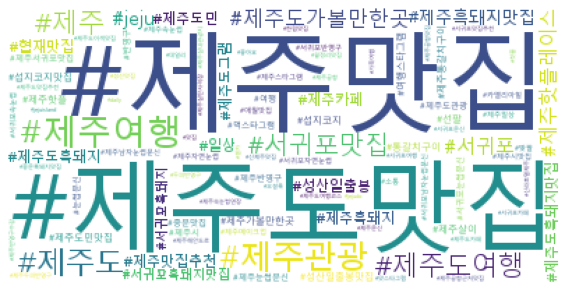

In [17]:
wordcloud = WordCloud(font_path = font_path,
            background_color = 'white',
                      width = 400,
                      height = 200,
                      relative_scaling = 0.3,
            max_words = 100).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize = (10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/jhjh3/class/datasalon-master/02_data_class/5_Jeju_Hotplace/newfiles/word_cloud_class_review.png')

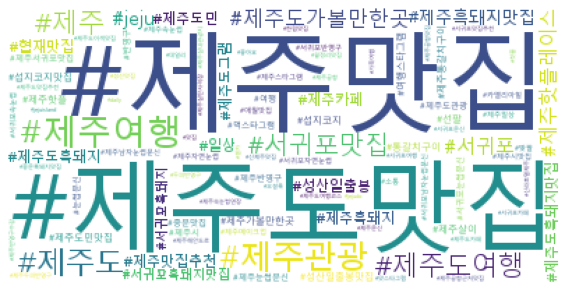

In [18]:
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
# plt.savefig('./newfiles/word_cloud_class.png')